In [1]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import statsmodels.api as stats
import sklearn as sklearn
from sklearn import preprocessing

In [2]:
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("matplotlib version:", mat.__version__)
print("statsmodels version:", stats.__version__)
print("sklearn version:", sklearn.__version__)

pandas version: 1.0.5
numpy version: 1.18.5
matplotlib version: 3.3.0
statsmodels version: 0.11.1
sklearn version: 0.23.1


In [3]:
# Load data from sklearn package
from sklearn import datasets
boston = datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
# Load boston into the dataframe
dataframe = pd.DataFrame(data = boston.data, columns =boston.feature_names)
print("Shape of the dataframe", dataframe.shape)

# Adding one more column into the dataset
dataframe['Target'] = boston.target
print("Shape of the dataframe", dataframe.shape)
print()

dataframe = dataframe.rename(columns = {'Target':'Price'})
print(dataframe.columns)

Shape of the dataframe (506, 13)
Shape of the dataframe (506, 14)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')


In [5]:
# Lets see the correlation among all the features of the dataset
correlation = dataframe.corr()
print(correlation)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [6]:
# Print the description about the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
# correlation['Price'].sort_values(ascending = False)
corr_values = correlation['Price'].abs().sort_values(ascending = False)
print(corr_values)
# This shows that the 'Price' largely depends on the first two parameters ('LSTAT' and 'RM')
# We will also take 'TAX' parameter into account for predicting the 'Price'
# RM       average number of rooms per dwelling
# LSTAT    % lower status of the population
# TAX      full-value property-tax rate per $10,000

Price      1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Price, dtype: float64


In [8]:
# Data Standardization
# Multiple Linear Regression with three variables
x_RM = preprocessing.scale(dataframe['RM'])
x_LSTAT = preprocessing.scale(dataframe['LSTAT'])
x_TAX = preprocessing.scale(dataframe['TAX'])
Y_observed = preprocessing.scale(dataframe['Price'])

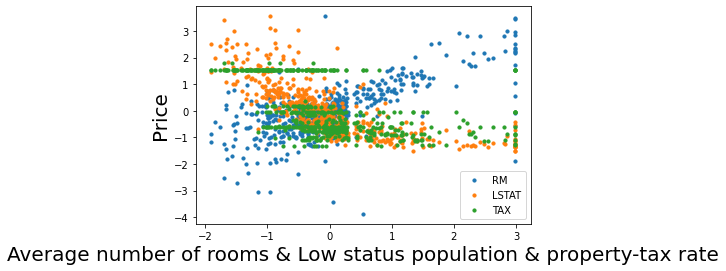

In [9]:
plt.scatter(Y_observed, x_RM, s = 10, label = 'RM')
plt.scatter(Y_observed, x_LSTAT, s = 10, label = 'LSTAT')
plt.scatter(Y_observed, x_TAX, s = 10, label = 'TAX')
plt.legend(fontsize = 20)
plt.xlabel('Average number of rooms & Low status population & property-tax rate', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.legend()
plt.show()

In [10]:
# Adding column of ones to x vector
X_featured = np.c_[np.ones(x_RM.shape[0]) ,x_RM, x_LSTAT, x_TAX]
# X_featured is a Nx4 matrix

In [11]:
# Gradient Descent Impl
def gradient_descent_impl_2(x, y):
    # Parameters required for Gradient Descent
    alpha = 0.0001   #learning rate
    m = y.size  #no. of samples
    cost_list = []   # to record all cost values to this list
    theta_list = []  # to record all theta_0 and theta_1 values to this list 
    prediction_list = []
    np.random.seed(0)
    theta = np.random.rand(4)  #initializing theta with 4 random values for 3 variables and 1 constant
    
    run = True
    cost_list.append(1e10)    # we append some large value to the cost list
    i=0
    while run:
        prediction = np.dot(x, theta)   # predicted y values theta_0*x0+theta_1*x1
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)   #  (1/2m)*sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        if cost_list[i] - cost_list[i + 1] < 1e-9:   # checking if the change in cost function is less than 10^(-9)
            run = False

        i += 1
    cost_list.pop(0)   # Remove the large number we added in the begining 
    return prediction_list, cost_list, theta_list
## END

In [12]:
# This will give us our predictions along with the best values for variables.
prediction_list, cost_list, theta_list = gradient_descent_impl_2(X_featured, Y_observed)
# This contains the 
theta = theta_list[-1]

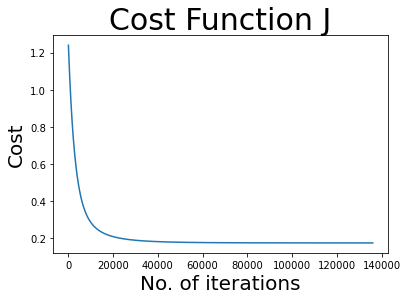

In [13]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size = 20)
plt.ylabel('Cost', size = 20)
plt.plot(cost_list)
plt.show()

In [14]:
# Using equation of hyperplane
Y_predicted = theta[0] + theta[1]*X_featured[:,1] + theta[2]*X_featured[:,2] + theta[3]*X_featured[:,3]
# print(Y_predicted)

In [15]:
# Result of the regression analysis
# Regression Coefficeints for the model
print("Y-Intercept: {}".format(round(theta[0], 5)))
print("coefficient of RM: {}".format(round(theta[1], 5)))
print("coefficient of LSTAT: {}".format(round(theta[2], 5)))
print("coefficient of TAX: {}".format(round(theta[3], 5)))

Y-Intercept: 0.0
coefficient of RM: 0.40252
coefficient of LSTAT: -0.42126
coefficient of TAX: -0.12301


In [16]:
# Mean square of residuals
MSE_equ = ((Y_predicted - Y_observed)**2).mean()  #Using yp from equation of hyperplane
MSE_GD = ((prediction_list[-1] - Y_observed)**2).mean()  #From Gradient Descent
print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_equ,3)))
print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))
print()

# Model Performance
# R2 for gradient descent approach
r2 = 1 - (sum((Y_observed - prediction_list[-1])**2)) / (sum((Y_observed - Y_observed.mean())**2))
print('R square doing from the scratch: {}'.format(round(r2,4)))

Mean Square Error using equation of hyperplane : 0.352
Mean Square Error from Gradient Descent prediction : 0.352

R square doing from the scratch: 0.6485
